## 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from surprise.model_selection import train_test_split

In [2]:
ratings_df = pd.read_csv("ratings_Electronics.csv", header=None, names=['userId','productId','ratings','timestamp'])
ratings_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
#dropping the timestamp column
ratings_df = ratings_df.drop(axis=1,columns='timestamp')
ratings_df.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [4]:
ratings_df.shape

(7824482, 3)

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [6]:
ratings_df.duplicated().any()

False

In [7]:
ratings_df.isna().any()

userId       False
productId    False
ratings      False
dtype: bool

In [8]:
ratings_df.isnull().any()

userId       False
productId    False
ratings      False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C0019A5C0>]],
      dtype=object)

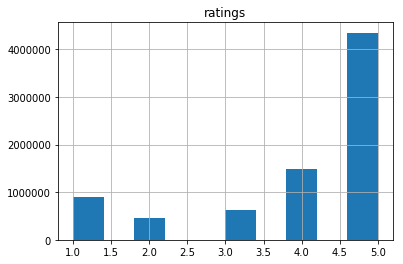

In [9]:
ratings_df.hist()

In [10]:
ratings_df["userId"].describe()

count           7824482
unique          4201696
top       A5JLAU2ARJ0BO
freq                520
Name: userId, dtype: object

In [11]:
ratings_df["userId"].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

In [12]:
ratings_df["productId"].describe()

count        7824482
unique        476002
top       B0074BW614
freq           18244
Name: productId, dtype: object

In [13]:
ratings_df["productId"].value_counts().head()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: productId, dtype: int64

In [14]:
ratings_df["ratings"].value_counts().head()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

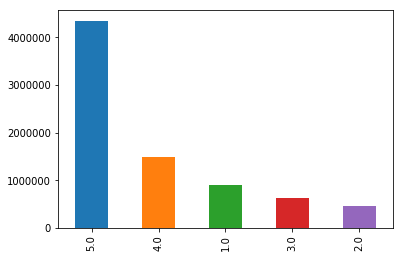

In [15]:
ratings_df['ratings'].value_counts().plot(kind='bar')

In [16]:
ratings_new=pd.DataFrame( ratings_df.groupby("productId")["ratings"].mean())
ratings_new.head()

,ratings
productId,
0132793040,5.000000
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852


In [17]:
ratings_df.groupby("productId")["ratings"].count()

productId
0132793040     1
0321732944     1
0439886341     3
0511189877     6
0528881469    27
0558835155     1
059400232X     3
0594012015     8
0594017343     1
0594017580     1
0594033896     5
0594033926    15
0594033934     2
0594202442     1
0594287995     1
0594296420     6
0594450209     2
0594450705     1
0594451647    14
0594477670     3
0594478162     1
0594481813    31
0594481902    13
0594482127     1
0594511488     2
0594514681     2
0594514789     1
0594549507     1
0594549558     1
0743610431     2
              ..
B00LGN7Y3G     1
B00LGQ6HL8     6
B00LH4U5JO     1
B00LH52WT4     3
B00LH9OL5I     1
B00LHPXVBW     1
B00LI4U2B4     1
B00LI4ZZO8     3
B00LI8Y9Y6     1
B00LITPNRC     1
B00LJO86NE     2
B00LJZWBK2     1
B00LKG1MC8     1
B00LKWBN0I     1
B00LKWZKH0     1
B00LMCPYPG     3
B00LMKAUU2     1
B00LMMIQ4C     1
B00LMOH8DU     4
B00LNUH5X6     1
B00LOLBBQQ     2
B00LPQRT34     1
B00LS5WBYE     1
B00LTAUTHE     1
B00LXEC8CU     1
BT008G3W52     1
BT008SXQ4C     1
BT00

In [18]:
ratings_df.groupby("userId")["ratings"].mean()

userId
A00000262KYZUE4J55XGL    5.000000
A000063614T1OE0BUSKUT    5.000000
A00009182QVLSWIGHLS1B    5.000000
A00009661LC9LQPGKJ24G    5.000000
A00010809P09NUU6ZP6H     5.000000
A00014061C2IZNE0YEILY    4.000000
A000145014WOTZJ5NSKOR    5.000000
A00015222LZ55IJSVL5IX    1.000000
A00015228CUPGPF957DS     1.000000
A0001528BGUBOEVR6T5U     4.500000
A00018041RRVMCICCAP79    5.000000
A000186437REL8X2RW8UW    4.000000
A000187635I595IAVSQLH    5.000000
A00019466UY2KR1IPXQN     4.000000
A0002012T7HVDB2EF4RH     4.000000
A0002032ZFQKDVHYKGWR     5.000000
A0002550196XWX0PEOZND    3.000000
A00027081JC8NE8X6TD5     5.000000
A00027561NC7JTXEP3EOD    1.000000
A00028781NF0U7YEN9U19    5.000000
A00029263J863WSR0TDRS    4.000000
A000294826HEMAY5L3K1H    5.000000
A00029825UMZ6N0ETLHY     5.000000
A00033481VZEEGYXEN32T    3.666667
A00037441I8XOQJSUWCAG    5.000000
A00038802J7X43YTW44TD    3.000000
A000428226SAAAIBK8I36    5.000000
A0004478EF5NFPHLGCWG     4.000000
A00045341JXVKNK93M6JE    5.000000
A000596

## 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [19]:
#filter_user = ratings_df["userId"].value_counts() >= 250
#filter_user = filter_user[filter_user].index.tolist()

#filter_product = ratings_df["productId"].value_counts() >= 250
#filter_product = filter_product[filter_product].index.tolist()

#ratings_df_new = ratings_df[(ratings_df['userId'].isin(filter_user)) | (ratings_df['productId'].isin(filter_product))]

#ratings_df_new.shape

In [20]:
rating_VC = ratings_df['userId'].value_counts()

In [21]:
rating_VC_idx_lst = rating_VC[rating_VC>150].index.tolist()

In [22]:
ratings_df_new = ratings_df[ratings_df['userId'].isin(rating_VC_idx_lst)]

In [23]:
ratings_df_new.shape

(21810, 3)

In [24]:
ratings_df_new.head()

,userId,productId,ratings
178,A17HMM1M7T9PJ1,0970407998,4.0
631,A3TAS1AG6FMBQW,0972683275,5.0
2162,A5JLAU2ARJ0BO,1400532655,1.0
3383,A3PD8JD9L4WEII,1400699169,5.0
4495,A1ZU55TM45Y2R8,8862936826,2.0


## 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [25]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [26]:
data = Dataset.load_from_df(ratings_df_new[['userId', 'productId', 'ratings']], reader)

In [27]:
data

In [28]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

In [29]:
# Split data to train and test
from sklearn.model_selection import train_test_split
trainset_sk, testset_sk = train_test_split(ratings_df_new, test_size = 0.30, random_state=0)

## 4. Build Popularity Recommender model.

In [30]:
class Popularity_Recommender():

    # Initialize all the variables
    def __init__(self):
        # Tha training data which is been provided.
        self.train_data = None

        # The id of the user for which the recommendations is needed.
        self.user_id = None

        # The id of item e.g. Songs, Movies, Products etc.
        self.item_id = None

        # The final result which is going to be returned as a dataframe. 
        self.popularity_recommendataions = None

    # Create the recommendations.
    def create(self,train_data,user_id,item_id):

        # The training data
        self.train_data = train_data

        # The id of the user for which the recommendations is needed.
        self.user_id = user_id

        # The id of item e.g. Songs, Movies, Products etc.
        self.item_id = item_id


        # The items are grouped by item_id aggregated with the count of the users and the index is reseted.
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        
        # The column named user_id is replaced by the name score.
        train_data_grouped.rename(columns = {'userId': 'score'}, inplace = True)


        # The training data is sorted according to the score in descending order and by item_id in ascending order.
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
        # The new column named Rank is created by score sorted in ascending order.
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending = 0, method = 'first')


        # The first 15 items are saved into the popularity_recommendataions and it is returned. 
        self.popularity_recommendataions = train_data_sort.head(15)


    # Method to user created recommendations
    def recommend(self, userId):

        # Init the user_recommendataion var by popularity_recommendataions since the recommendations has been saved into this column.
        user_recommendataion = self.popularity_recommendataions

        # Get the user_id
        user_recommendataion['userId'] = userId

        # Set the columns
        cols = user_recommendataion.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendataion = user_recommendataion[cols]

        return user_recommendataion

In [31]:
users = ratings_df_new['userId'].unique()
len(users)

98

In [32]:
items = ratings_df_new['productId'].unique()
len(items)

13405

In [33]:
pr = Popularity_Recommender()
pr.create(trainset_sk, 'userId', 'productId')

In [34]:
pr.recommend(users[5])

,userId,productId,score,Rank
5491,A1VQHH85U7PX0,B003ES5ZUU,20,1.0
6196,A1VQHH85U7PX0,B004CLYEE6,18,2.0
6195,A1VQHH85U7PX0,B004CLYEDC,17,3.0
6197,A1VQHH85U7PX0,B004CLYEFK,17,4.0
8016,A1VQHH85U7PX0,B0088CJT4U,17,5.0
8941,A1VQHH85U7PX0,B00BOHNYTW,17,6.0
9690,A1VQHH85U7PX0,B00G4UQ6U8,17,7.0
4940,A1VQHH85U7PX0,B002R5AM7C,16,8.0
7963,A1VQHH85U7PX0,B00829TIEK,16,9.0
7967,A1VQHH85U7PX0,B0082E9K7U,16,10.0


In [35]:
pr.recommend(users[25])

,userId,productId,score,Rank
5491,A1J75JJ0Q2OEJN,B003ES5ZUU,20,1.0
6196,A1J75JJ0Q2OEJN,B004CLYEE6,18,2.0
6195,A1J75JJ0Q2OEJN,B004CLYEDC,17,3.0
6197,A1J75JJ0Q2OEJN,B004CLYEFK,17,4.0
8016,A1J75JJ0Q2OEJN,B0088CJT4U,17,5.0
8941,A1J75JJ0Q2OEJN,B00BOHNYTW,17,6.0
9690,A1J75JJ0Q2OEJN,B00G4UQ6U8,17,7.0
4940,A1J75JJ0Q2OEJN,B002R5AM7C,16,8.0
7963,A1J75JJ0Q2OEJN,B00829TIEK,16,9.0
7967,A1J75JJ0Q2OEJN,B0082E9K7U,16,10.0


In [39]:
import pandas

#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['userId', 'productId', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no products for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique products for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique products in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [40]:
is_model = item_similarity_recommender_py()
is_model.create(trainset_sk, 'userId', 'productId')

In [41]:
#personalized model to recommed some products
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A1VQHH85U7PX0:
------------------------------------------------------------------------------------
B000FGGG34
B000BHQCP4
B00007E7JU
B008RW6RGE
B0011FQUQG
B0009XVGMO
B00008XETO
B000VX6XL6
B000OLDG60
B00B7XC6PQ
B0002V9IKK
B003CJTQJC
B00829TIEK
B007PJ4P4G
B0044WWLW0
B00181C9LS
B001TH7GSW
B00168YB78
B00HRQB28Y
B004DI7CWE
B001GKRM90
B005276QS6
B004VEJYEO
B000RB7C4E
B00FFZD51Q
B00IDYRZ0S
B004ALM80A
B004R739LE
B008ULPD0S
B00CRY250U
B00007EDM8
B00020E4QO
B004T9RR6I
B0002855KK
B0006LSINO
B00CXADBRY
B0039BPG1U
B00000K13I
B00004ZCJE
B004CLYEAK
B006M1MW1Q
B0041L3JS4
9043413585
B005RCVC4E
B001M4XCHQ
B001GECECQ
B0097CZHAU
B005KAK2FI
B00AB3CGF8
B00009R6UU
B002QUZL10
B00109Y2DQ
B0000A98AC
B005ELV3HE
B000V5G4TK
B000V9D5LG
B007LK5S0E
B00G6CLNCK
B00J3HMY1E
B000AKK71C
B002MUGUFK
B001TOD7ME
B001DL9WDG
B008ULPAT2
B002NDBD8K
B007X3VEBG
B0012V3D3C
B002VPE1Z2
B002JCSCYS
B000BKJZ9Q
B

,userId,productId,score,rank
0,A1VQHH85U7PX0,B00F3F0EIU,0.023531,1
1,A1VQHH85U7PX0,B00137NMMW,0.022234,2
2,A1VQHH85U7PX0,B009O7XO8U,0.022141,3
3,A1VQHH85U7PX0,B004TPJKEY,0.022016,4
4,A1VQHH85U7PX0,B005LMWPYG,0.021962,5
5,A1VQHH85U7PX0,B002R5AM7C,0.020173,6
6,A1VQHH85U7PX0,B005FDXMJS,0.019946,7
7,A1VQHH85U7PX0,B004CLYEH8,0.019932,8
8,A1VQHH85U7PX0,B0097CXWUW,0.019906,9
9,A1VQHH85U7PX0,B009PK9S90,0.019887,10


In [42]:
## for another user

user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: ADLVFFE4VBT8:
------------------------------------------------------------------------------------
B000FVGM38
B0019M9ESC
B000MF7R4K
B00IF0KJTE
B00CBD2X5E
B008X9Z528
B00GSEOV7U
B00FENIPQ4
B002WE4HE2
B0053R0WWG
B00EE18LRU
B009C98NPY
B000JVCPEY
B001P05NBA
B001RB1QWW
B001GXUCNU
B000HEANB0
B00006343P
B00123WZWK
B00005114Z
B003O8682Y
B003DZ165W
B00BZC31WQ
B0055QYJIS
B005FDXMJS
B002PHLZE6
B004Q3R9AQ
B003VWY0VY
B001LF4130
B005EWB37S
B001GQ39N2
B00923G46U
B00GPKLWKQ
B004CLYJ1Y
B000JMJWV2
B00006B8K2
B004E8Z8Q0
B00B588HY2
B001PMTAFI
B00C57P2BI
B001XXAZH6
B0011FQUUW
B002P3KO8I
B008PWUPVY
B005KELR3A
B001MYLBKG
B002C1B9QY
B001FRRD48
B001RNNXQM
B00AQDG9BA
B00JWXTOIA
B0011U65F2
B007PTCFFW
B005NHR6KM
B008AGP5H4
B000BYA5NC
B00DR8LAE2
B0019M9ENM
B0019K3VBU
B002BDU89M
B002Y6CJJ8
B002DEM9G4
B0073FE1F0
B00608WXGA
B00113X7Q4
B00G500AE0
B002WDMMFO
B005GL0H24
B002CZ1E2O
B00H7FYEPI
B0

,userId,productId,score,rank
0,ADLVFFE4VBT8,B00HFFDDLG,0.022686,1
1,ADLVFFE4VBT8,B0082E9K7U,0.022559,2
2,ADLVFFE4VBT8,B00E3FHXYO,0.021515,3
3,ADLVFFE4VBT8,B00BB72WX4,0.021355,4
4,ADLVFFE4VBT8,B00BB6LTI4,0.021175,5
5,ADLVFFE4VBT8,B00CZDT30S,0.020611,6
6,ADLVFFE4VBT8,B00GMTN96U,0.020606,7
7,ADLVFFE4VBT8,B006RG23JC,0.020466,8
8,ADLVFFE4VBT8,B00G4V0QSK,0.020423,9
9,ADLVFFE4VBT8,B00FSA8VQ2,0.020276,10


## 5. Build Collaborative Filtering model.

In [43]:
# user item rating data can be obtained as follows
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [44]:
user_records[0]

[(0, 4.0),
 (81, 4.0),
 (195, 3.0),
 (278, 4.0),
 (306, 4.0),
 (445, 4.0),
 (501, 5.0),
 (897, 4.0),
 (957, 4.0),
 (1071, 3.0),
 (1363, 4.0),
 (1480, 4.0),
 (1530, 4.0),
 (1592, 4.0),
 (1691, 4.0),
 (1789, 3.0),
 (2013, 2.0),
 (2060, 3.0),
 (237, 4.0),
 (2958, 4.0),
 (457, 4.0),
 (3249, 4.0),
 (3319, 4.0),
 (3538, 4.0),
 (1621, 4.0),
 (3713, 4.0),
 (3842, 4.0),
 (654, 4.0),
 (3986, 4.0),
 (4003, 4.0),
 (4036, 4.0),
 (4153, 4.0),
 (3483, 5.0),
 (4247, 2.0),
 (4371, 5.0),
 (4394, 4.0),
 (4533, 3.0),
 (4573, 3.0),
 (4600, 3.0),
 (4657, 4.0),
 (4798, 3.0),
 (4825, 4.0),
 (4858, 4.0),
 (4873, 4.0),
 (5009, 4.0),
 (5111, 5.0),
 (5149, 4.0),
 (5168, 3.0),
 (5235, 4.0),
 (5271, 4.0),
 (5332, 4.0),
 (5495, 4.0),
 (5507, 4.0),
 (5778, 4.0),
 (4658, 2.0),
 (5935, 5.0),
 (5974, 5.0),
 (2433, 3.0),
 (6209, 4.0),
 (5630, 5.0),
 (6251, 5.0),
 (6350, 4.0),
 (6412, 4.0),
 (6604, 4.0),
 (2124, 4.0),
 (2903, 4.0),
 (6763, 5.0),
 (6994, 3.0),
 (4521, 4.0),
 (7083, 4.0),
 (7111, 4.0),
 (425, 4.0),
 (7258, 

### KNN Model

In [45]:
from surprise import KNNWithMeans
from surprise import accuracy

In [46]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [47]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))

A3W4D8XOGLWUN5
B00KC7VY3S


In [48]:
sim_Product = algo.get_neighbors(trainset.to_inner_iid("B00AYB3OMG"), k = 10)

In [49]:
[trainset.to_raw_iid(x) for x in sim_Product]

['B00KC7VY3S',
 'B004SD2562',
 'B00BXF5FVU',
 'B004Z9XZHM',
 'B009SPUY5O',
 'B0044CL1N0',
 'B0035JEL6C',
 'B002JKEM58',
 'B008EQYRRY',
 'B001HU4ASU']

In [50]:
len(testset)

6543

In [51]:
testset[0:5]

[('ABQWMANK4AR63', 'B002V8C3W2', 4.0),
 ('A3J8A5L5AF5TX9', 'B001O4EPHA', 5.0),
 ('A3V7D0LH8L7BG0', 'B000QSF2FY', 4.0),
 ('A1ODOGXEYECQQ8', 'B001QFYCXO', 3.0),
 ('A1UQBFCERIP7VJ', 'B0009U7XH4', 5.0)]

In [52]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0218


1.0218140913179155

In [53]:
# View a particular prediction
test_pred[2]

Prediction(uid='A3V7D0LH8L7BG0', iid='B000QSF2FY', r_ui=4.0, est=4.312176590030785, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [54]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [55]:
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
2,A3V7D0LH8L7BG0,B000QSF2FY,4.0,4.312177,"{'was_impossible': True, 'reason': 'User and/o...",True
3,A1ODOGXEYECQQ8,B001QFYCXO,3.0,4.312177,"{'was_impossible': True, 'reason': 'User and/o...",True
4,A1UQBFCERIP7VJ,B0009U7XH4,5.0,4.312177,"{'was_impossible': True, 'reason': 'User and/o...",True
8,A3OA4DV4L81N1D,B00829USMQ,4.0,4.312177,"{'was_impossible': True, 'reason': 'User and/o...",True
11,AT6CZDCP4TRGA,B000FUJEM0,4.0,4.312177,"{'was_impossible': True, 'reason': 'User and/o...",True


In [56]:
test_pred_df.loc[test_pred_df.was_impossible==True].count()

uid               3351
iid               3351
r_ui              3351
est               3351
details           3351
was_impossible    3351
dtype: int64

In [57]:
testset_new = trainset.build_anti_testset()
testset_new[0:5]
predictions = algo.test(testset_new[0:10000])
predictions_df = pd.DataFrame([[x.uid,x.est] for x in predictions])
predictions_df.columns = ["userId","est_rating"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)
predictions_df.head()
top_10_recos = predictions_df.groupby("userId").head(10).reset_index(drop=True)

In [58]:
top_10_recos

,userId,est_rating
0,A3W4D8XOGLWUN5,5.0
1,A3W4D8XOGLWUN5,5.0
2,A3W4D8XOGLWUN5,5.0
3,A3W4D8XOGLWUN5,5.0
4,A3W4D8XOGLWUN5,5.0
5,A3W4D8XOGLWUN5,5.0
6,A3W4D8XOGLWUN5,5.0
7,A3W4D8XOGLWUN5,5.0
8,A3W4D8XOGLWUN5,5.0
9,A3W4D8XOGLWUN5,5.0


### SVD Based

In [59]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df_new, reader)

In [60]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [61]:
from surprise import SVD
from surprise import accuracy

In [62]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [63]:
test_pred = svd_model.test(testset)
accuracy.rmse(test_pred)

RMSE: 2.0210


2.0209502707077096

In [64]:
user_factors = svd_model.pu
user_factors.shape
item_factors = svd_model.qi
item_factors.shape

(10837, 50)

In [65]:
pred = np.dot(user_factors,np.transpose(item_factors))
pred[95,0:5]

array([1.3860494 , 1.5181694 , 3.48661599, 0.48372407, 1.8571862 ])

In [66]:
svd_model.predict(uid = trainset.to_raw_uid(95), iid = trainset.to_raw_iid(0))

Prediction(uid='A3NHUQ33CFH3VM', iid='B00KC7VY3S', r_ui=None, est=1.3860494008996778, details={'was_impossible': False})

## 6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

In [67]:
#Class to calculate precision and recall

import random
import pandas

class precision_recall_calculator():
    
    def __init__(self, test_data, train_data, pm, is_model):
        self.test_data = test_data
        self.train_data = train_data
        self.user_test_sample = None
        self.model1 = pm
        self.model2 = is_model
        
        self.ism_training_dict = dict()
        self.pm_training_dict = dict()
        self.test_dict = dict()
    
    #Method to return random percentage of values from a list
    def remove_percentage(self, list_a, percentage):
        k = int(len(list_a) * percentage)
        random.seed(0)
        indicies = random.sample(range(len(list_a)), k)
        new_list = [list_a[i] for i in indicies]
    
        return new_list
    
    #Create a test sample of users for use in calculating precision
    #and recall
    def create_user_test_sample(self, percentage):
        #Find users common between training and test set
        users_test_and_training = list(set(self.test_data['userId'].unique()).intersection(set(self.train_data['userId'].unique())))
        print("Length of user_test_and_training:%d" % len(users_test_and_training))

        #Take only random user_sample of users for evaluations
        self.users_test_sample = self.remove_percentage(users_test_and_training, percentage)

        print("Length of user sample:%d" % len(self.users_test_sample))
        
    #Method to generate recommendations for users in the user test sample
    def get_test_sample_recommendations(self):
        #For these test_sample users, get top 10 recommendations from training set
        #self.ism_training_dict = {}
        #self.pm_training_dict = {}

        #self.test_dict = {}

        for user_id in self.users_test_sample:
            #Get items for user_id from item similarity model
            print("Getting recommendations for user:%s" % user_id)
            user_sim_items = self.model2.recommend(user_id)
            print("user_sim_items",user_sim_items.columns)
            self.ism_training_dict[user_id] = list(user_sim_items['productId'])
    
            #Get items for user_id from popularity model
            user_sim_items = self.model1.recommend(user_id)
            self.pm_training_dict[user_id] = list(user_sim_items['productId'])
    
            #Get items for user_id from test_data
            test_data_user = self.test_data[self.test_data['userId'] == user_id]
            self.test_dict[user_id] = set(test_data_user['productId'].unique() )
    
    #Method to calculate the precision and recall measures
    def calculate_precision_recall(self):
        #Create cutoff list for precision and recall calculation
        cutoff_list = list(range(1,11))


        #For each distinct cutoff:
        #    1. For each distinct user, calculate precision and recall.
        #    2. Calculate average precision and recall.

        ism_avg_precision_list = []
        ism_avg_recall_list = []
        pm_avg_precision_list = []
        pm_avg_recall_list = []


        num_users_sample = len(self.users_test_sample)
        for N in cutoff_list:
            ism_sum_precision = 0
            ism_sum_recall = 0
            pm_sum_precision = 0
            pm_sum_recall = 0
            ism_avg_precision = 0
            ism_avg_recall = 0
            pm_avg_precision = 0
            pm_avg_recall = 0

            for user_id in self.users_test_sample:
                ism_hitset = self.test_dict[user_id].intersection(set(self.ism_training_dict[user_id][0:N]))
                pm_hitset = self.test_dict[user_id].intersection(set(self.pm_training_dict[user_id][0:N]))
                testset = self.test_dict[user_id]
        
                pm_sum_precision += float(len(pm_hitset))/float(N)
                pm_sum_recall += float(len(pm_hitset))/float(len(testset))

                ism_sum_precision += float(len(ism_hitset))/float(len(testset))
                ism_sum_recall += float(len(ism_hitset))/float(N)
        
            pm_avg_precision = pm_sum_precision/float(num_users_sample)
            pm_avg_recall = pm_sum_recall/float(num_users_sample)
    
            ism_avg_precision = ism_sum_precision/float(num_users_sample)
            ism_avg_recall = ism_sum_recall/float(num_users_sample)

            ism_avg_precision_list.append(ism_avg_precision)
            ism_avg_recall_list.append(ism_avg_recall)
    
            pm_avg_precision_list.append(pm_avg_precision)
            pm_avg_recall_list.append(pm_avg_recall)
            
        return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)
     

    #A wrapper method to calculate all the evaluation measures
    def calculate_measures(self, percentage):
        #Create a test sample of users
        self.create_user_test_sample(percentage)
        
        #Generate recommendations for the test sample users
        self.get_test_sample_recommendations()
        
        #Calculate precision and recall at different cutoff values
        #for popularity mode (pm) as well as item similarity model (ism)
        
        return self.calculate_precision_recall()
        #return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)    

In [68]:
pr

In [69]:
import time
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pm = precision_recall_calculator(testset_sk, trainset_sk, pr, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pm.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:98
Length of user sample:4
Getting recommendations for user:A3R4794K2RVU1S
No. of unique products for the user: 119
no. of unique products in the training set: 10250
Non zero values in cooccurence_matrix :32954
user_sim_items Index(['userId', 'productId', 'score', 'rank'], dtype='object')
Getting recommendations for user:ABDR6IJ93HFIO
No. of unique products for the user: 140
no. of unique products in the training set: 10250
Non zero values in cooccurence_matrix :53081
user_sim_items Index(['userId', 'productId', 'score', 'rank'], dtype='object')
Getting recommendations for user:AZMY6E8B52L2T
No. of unique products for the user: 122
no. of unique products in the training set: 10250
Non zero values in cooccurence_matrix :54701
user_sim_items Index(['userId', 'productId', 'score', 'rank'], dtype='object')
Getting recommendations for user:A1RPTVW5VEOSI
No. of unique products for the user: 112
no. of unique products in the training set: 10250
Non zero values

In [70]:
print(pm_avg_precision_list)

[0.25, 0.125, 0.08333333333333333, 0.0625, 0.05, 0.041666666666666664, 0.03571428571428571, 0.03125, 0.05555555555555555, 0.1]


In [71]:
print(pm_avg_recall_list)

[0.0037313432835820895, 0.0037313432835820895, 0.0037313432835820895, 0.0037313432835820895, 0.0037313432835820895, 0.0037313432835820895, 0.0037313432835820895, 0.0037313432835820895, 0.008276797829036635, 0.01745188200412081]


In [72]:
print(ism_avg_precision_list)

[0.0, 0.0, 0.0, 0.0, 0.0037313432835820895, 0.0037313432835820895, 0.011848651479444881, 0.011848651479444881, 0.011848651479444881, 0.011848651479444881]


In [73]:
print(ism_avg_recall_list)

[0.0, 0.0, 0.0, 0.0, 0.05, 0.041666666666666664, 0.10714285714285714, 0.09375, 0.08333333333333333, 0.07500000000000001]


In [74]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


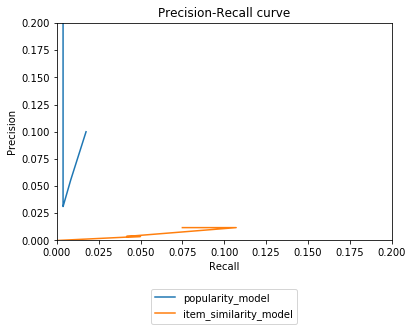

In [75]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [76]:
import recmetrics

In [77]:
test = test_pred_df.copy()
test.drop({"details","was_impossible"}, inplace=True, axis=1)
test.columns = ['userId', 'productId', 'actual', 'cf_predictions']
test.head()

,userId,productId,actual,cf_predictions
0,ABQWMANK4AR63,B002V8C3W2,4.0,5.000000
1,A3J8A5L5AF5TX9,B001O4EPHA,5.0,5.000000
2,A3V7D0LH8L7BG0,B000QSF2FY,4.0,4.312177
3,A1ODOGXEYECQQ8,B001QFYCXO,3.0,4.312177
4,A1UQBFCERIP7VJ,B0009U7XH4,5.0,4.312177


In [78]:
print("MSE -", recmetrics.mse(test.actual, test.cf_predictions))
print("RMSE -", recmetrics.rmse(test.actual, test.cf_predictions))

MSE - 1.0441040372158574
RMSE - 1.0218140913179155


In [79]:
cf_model = test.pivot_table(index='userId', columns='productId', values='cf_predictions').fillna(0)
cf_model.head(10)

productId,0972683275,9043413585,B00000DM9W,B00000J08C,B00000J08Q,B00000J1TX,B00000J1US,B00000JBIA,B00000JDGO,B00000JFJA,...,B00L1I80K2,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L8I6SFY,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8
userId,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17HMM1M7T9PJ1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A18HE80910BTZI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A19W47CXJJP1MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BT6TL7UCIC5Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
test_pred_df.iloc[162,0]

'A680RUE1FDO8B'

In [81]:
def get_users_predictions(userId, n, model):
    recommended_items = pd.DataFrame(model.loc[userId])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [82]:
# Get example prediction
get_users_predictions('A2XRMQA6PJ5ZJ8', 10, cf_model)

['B001F7AJKI',
 'B000UE50O2',
 'B004V4IWHY',
 'B001764QQU',
 'B004K1EZDS',
 'B0009GZAGO',
 'B000W4TZSC',
 'B005BOMTT0',
 'B000ZMCILW',
 'B007BWTOHU']

In [83]:

test = test.copy().groupby('userId')['productId'].agg({'actual': (lambda x: list(set(x)))})
# make recommendations for all members in the test data
recs = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    recs.append(cf_predictions)
        
test['cf_predictions'] = recs
test.head()

,actual,cf_predictions
userId,,
A11I1I9QLMAM1A,"[B000Q3ECFK, B009C3M7H0, B008DWCRQW, B003L77Y5...","[B00E3FHXYO, B00HFFDDLG, B0018O77Q2, B004C9P9T..."
A11KZ906QD08C5,"[B003GR6IUK, B000GIT002, B00IVFDZBC, B0044R1VX...","[B004J3V7RO, B00ICZL3KG, B000EHUE7I, B001SER47..."
A12DQZKRKTNF5E,"[B00DK2JQOQ, B0009CDYF2, B0052SCU8U, B00DIFIM3...","[B00DKBU5W4, B006YLYYZ6, B006OM75I8, B00FMTIUD..."
A15QYHQH80W30L,"[B00009MDBQ, B001J8BPYM, B000144I30, B004HGVH5...","[B000VDCTCI, B000144I30, B009924TSY, B000VRV6L..."
A17BUUBOU0598B,"[B004CLYEFK, B004YNE7V2, B00A7FS3AW, B00ATZ9I8...","[B00A7FS3AW, B00023CJI6, B001IYS1QM, B001HMVAW..."


In [84]:
# make recommendations for all members in the test data based on popularity based approach
popularity_recs = ratings_df_new.productId.value_counts().head(10).index.tolist()

recs = []
for user in test.index:
    pop_predictions = popularity_recs
    recs.append(pop_predictions)
        
test['pop_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions
userId,,,
A11I1I9QLMAM1A,"[B000Q3ECFK, B009C3M7H0, B008DWCRQW, B003L77Y5...","[B00E3FHXYO, B00HFFDDLG, B0018O77Q2, B004C9P9T...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A11KZ906QD08C5,"[B003GR6IUK, B000GIT002, B00IVFDZBC, B0044R1VX...","[B004J3V7RO, B00ICZL3KG, B000EHUE7I, B001SER47...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A12DQZKRKTNF5E,"[B00DK2JQOQ, B0009CDYF2, B0052SCU8U, B00DIFIM3...","[B00DKBU5W4, B006YLYYZ6, B006OM75I8, B00FMTIUD...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A15QYHQH80W30L,"[B00009MDBQ, B001J8BPYM, B000144I30, B004HGVH5...","[B000VDCTCI, B000144I30, B009924TSY, B000VRV6L...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."
A17BUUBOU0598B,"[B004CLYEFK, B004YNE7V2, B00A7FS3AW, B00ATZ9I8...","[B00A7FS3AW, B00023CJI6, B001IYS1QM, B001HMVAW...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF..."


In [85]:

recs = []
for user in test.index:
    random_predictions = ratings_df_new.productId.sample(10).values.tolist()
    recs.append(random_predictions)
        
test['random_predictions'] = recs
test.head()

,actual,cf_predictions,pop_predictions,random_predictions
userId,,,,
A11I1I9QLMAM1A,"[B000Q3ECFK, B009C3M7H0, B008DWCRQW, B003L77Y5...","[B00E3FHXYO, B00HFFDDLG, B0018O77Q2, B004C9P9T...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B000XB9GV0, B007VPGL5U, B001RB24L4, B00018U7O..."
A11KZ906QD08C5,"[B003GR6IUK, B000GIT002, B00IVFDZBC, B0044R1VX...","[B004J3V7RO, B00ICZL3KG, B000EHUE7I, B001SER47...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B004CLYEE6, B00B5C2UDC, B005EV1R8Y, B001ISKNK..."
A12DQZKRKTNF5E,"[B00DK2JQOQ, B0009CDYF2, B0052SCU8U, B00DIFIM3...","[B00DKBU5W4, B006YLYYZ6, B006OM75I8, B00FMTIUD...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B006DEBYWU, B001MSVPM6, B000W8XQS8, B00009XVO..."
A15QYHQH80W30L,"[B00009MDBQ, B001J8BPYM, B000144I30, B004HGVH5...","[B000VDCTCI, B000144I30, B009924TSY, B000VRV6L...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B008ULPD0S, B00A3LSDKA, B00CBCUS1G, B000050ZS..."
A17BUUBOU0598B,"[B004CLYEFK, B004YNE7V2, B00A7FS3AW, B00ATZ9I8...","[B00A7FS3AW, B00023CJI6, B001IYS1QM, B001HMVAW...","[B003ES5ZUU, B0088CJT4U, B004CLYEDC, B004CLYEF...","[B004X8EO6Q, B004F1NZTS, B007OY5V68, B00HVT27B..."


In [86]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

In [87]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.0013499044484831656,
 0.0021157185768614765,
 0.002481888782748391,
 0.0030089995485617807,
 0.0032928106018480677,
 0.0035105541454597787,
 0.0036400390188762216,
 0.003898455705952882,
 0.004079141296725298,
 0.004225715959125087]

In [88]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.00024891321497940686,
 0.00024891321497940686,
 0.0003156065589836752,
 0.00038641543394945887,
 0.0004827826394688552,
 0.0004827826394688552,
 0.0005630854372797088,
 0.0005794381322038323,
 0.0005794381322038323,
 0.0006260868857491376]

In [89]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.01642592436395443,
 0.03285184872790886,
 0.049277773091863285,
 0.06570369745581772,
 0.08212962181977214,
 0.09855554618372657,
 0.11498147054768103,
 0.13140739491163544,
 0.14783331927558988,
 0.16425924363954428]

In [90]:
catalog = ratings_df_new.productId.unique().tolist()
random_coverage = recmetrics.coverage(random_predictions, catalog)
pop_coverage = recmetrics.coverage(pop_predictions, catalog)
cf_coverage = recmetrics.coverage(cf_predictions, catalog)

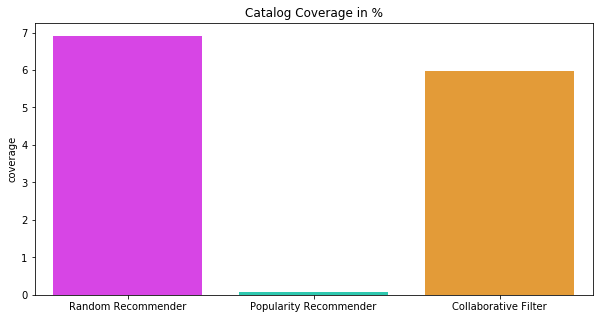

In [91]:
coverage_scores = [random_coverage, pop_coverage, cf_coverage]
model_names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(10, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

In [92]:
recmetrics.personalization(cf_predictions)

0.995097832947612

In [93]:
recmetrics.personalization(pop_predictions)

2.220446049250313e-16

## 7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

In [94]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [95]:
predictions_df.columns = ["userId","productId","est_rating"]
predictions_df.sort_values(by = ["userId","productId", "est_rating"],ascending=False,inplace=True)

In [96]:
top_5_recos = predictions_df.groupby("userId").head(5).reset_index(drop=True)
top_5_recos.head(5)

,userId,productId,est_rating
0,A3W4D8XOGLWUN5,B00LKG1MC8,5.0
1,A3W4D8XOGLWUN5,B00LGQ6HL8,5.0
2,A3W4D8XOGLWUN5,B00LA6T0LS,4.0
3,A3W4D8XOGLWUN5,B00L8I6SFY,5.0
4,A3W4D8XOGLWUN5,B00L43HAY6,5.0


## 8. Summarise your insights.

##### Compared to poularity model, recall rate of collaberative filtering is more.

##### Coverage of collaberative filetring is better than popularity model. 

##### We can go for popularity model when the recommendation is not useer's specific